# BoomBikes - Bike Sharing Assignment
### Problem Statement: 
BoomBikes aspires to understand the demand for shared bikes among the people
-to prepare themselves to cater to the people's needs
-to understand the factors on which the demand for these shared bikes depends

The company wants to know:
-Which variables are significant in predicting the demand for shared bikes.
-How well those variables describe the bike demands

### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.


In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 1: Reading and Understanding the Data

In [2]:
#Reading the dataframe from the csv file
boom=pd.read_csv('day.csv')

In [3]:
# Checking the header rows
boom.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Checking the counts of rows and columns
boom.shape

(730, 16)

In [5]:
# Observe all the columns has 730 non-null values
boom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Double-checking with another function - No null values found
boom.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# Checking all the numerical columns statistics
boom.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


- It is observed that other than dteday all the values are either float64 or int64 - even categorical variables like season, yr,mnth, holiday, weekday, workingday and weathersit
#### Step 2: Converting categorical values from numeric to object type for better understanding during EDA.

In [8]:
# Using the map function for observations with less value counts
boom.yr=boom.yr.map({0:'Y2018', 1:'Y2019'})
boom.season=boom.season.map({1:'spring',2:'summer', 3:'fall', 4:'winter'})
boom.weathersit=boom.weathersit.map({1:'Clear', 2:'Mist', 3:'Light Snow', 4:'Heavy Rain'})

# Using the replace function for columns with more distinct value counts
boom.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
boom.weekday.replace((0,1,2,3,4,5,6),('Sun','Mon','Tue','Wed','Thu','Fri','Sat'), inplace=True)

# Keeping the holiday and working day as is, but converting their type because they are categorical
# No numerical analysis to be performed on them
boom.holiday=boom.holiday.astype('object')
boom.workingday=boom.workingday.astype('object')

In [9]:
# Checking on the changes done in the categorical columns
boom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    object 
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    object 
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    object 
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(8)
memory usage: 91.4+ KB


In [10]:
boom.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,Y2018,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,Y2018,Jan,0,Tue,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,Y2018,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,Y2018,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,Y2018,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Step 2: Visualizing the Data
Let's now spend some time doing what is arguably the most important step - understanding the data.

If there is some obvious multicollinearity going on, this is the first place to catch it
Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

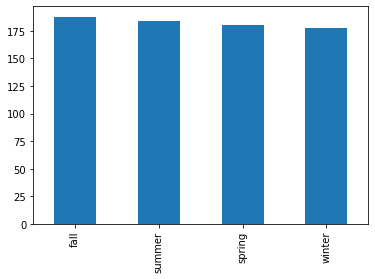

In [11]:
# Observe the rental uniform across all seasons
boom.season.value_counts().plot.bar()

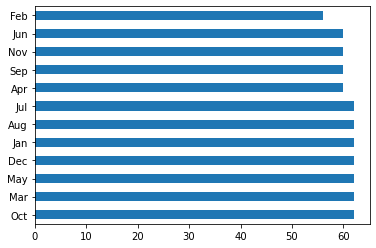

In [12]:
# The above observation is again validated with a slight dip in February
# Other than that the readings are pretty much in similar range across all months

boom.mnth.value_counts().plot.barh()

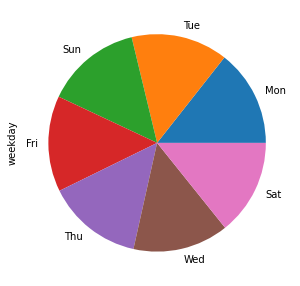

In [13]:
# Observe the data spread well across all the days of the week evenly
boom.weekday.value_counts().plot.pie(figsize=(5, 5))

In [14]:
# date to datetime format

boom['dteday'] = boom['dteday'].astype('datetime64')
boom.dteday.value_counts()

2019-10-25    1
2019-12-22    1
2019-03-08    1
2018-01-15    1
2018-03-18    1
             ..
2018-08-04    1
2018-10-05    1
2019-11-11    1
2019-02-12    1
2018-12-21    1
Name: dteday, Length: 730, dtype: int64

In [15]:
boom_categorical= boom.select_dtypes(exclude=['float64','int64','datetime64'])
boom_categorical

,season,yr,mnth,holiday,weekday,workingday,weathersit
0,spring,Y2018,Jan,0,Mon,1,Mist
1,spring,Y2018,Jan,0,Tue,1,Mist
2,spring,Y2018,Jan,0,Wed,1,Clear
3,spring,Y2018,Jan,0,Thu,1,Clear
4,spring,Y2018,Jan,0,Fri,1,Clear
...,...,...,...,...,...,...,...
725,spring,Y2019,Dec,0,Fri,1,Mist
726,spring,Y2019,Dec,0,Sat,0,Mist
727,spring,Y2019,Dec,0,Sun,0,Mist
728,spring,Y2019,Dec,0,Mon,1,Clear


In [16]:
boom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    object        
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    object        
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    object        
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

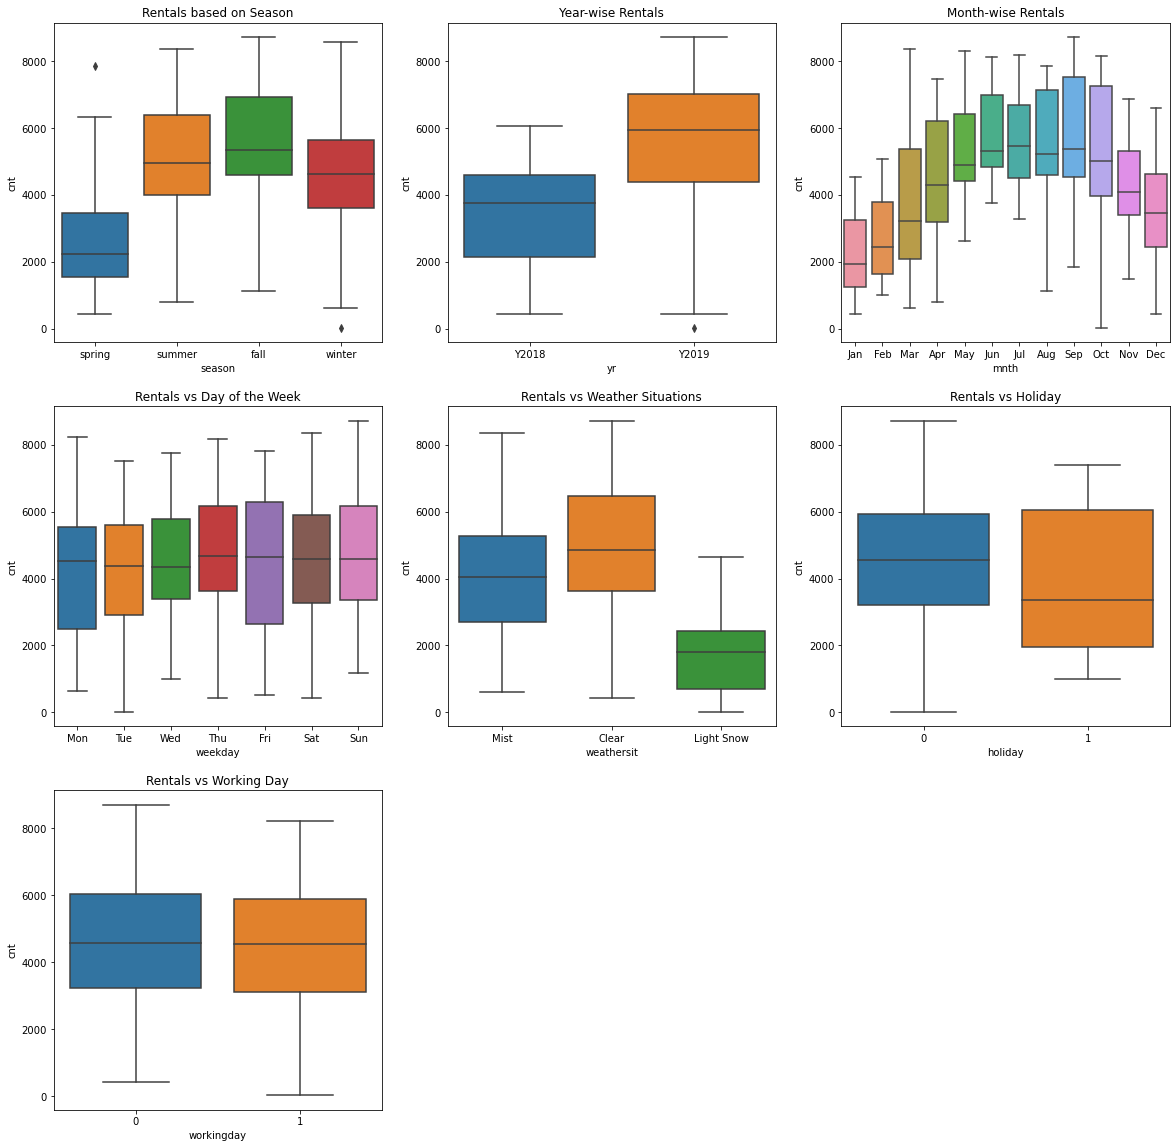

In [17]:
# Visualizing categorical Columns against target variable cnt
plt.figure(figsize=(20,20))
plt.subplot(331)
plt.title('Rentals based on Season')
sns.boxplot(x=boom.season,y='cnt',data=boom)
plt.subplot(332)
plt.title('Year-wise Rentals')
sns.boxplot(x='yr',y='cnt',data=boom)
plt.subplot(333)
plt.title('Month-wise Rentals')
sns.boxplot(x='mnth',y='cnt',data=boom)
plt.subplot(334)
plt.title('Rentals vs Day of the Week')
sns.boxplot(x='weekday',y='cnt',data=boom)
plt.subplot(335)
plt.title('Rentals vs Weather Situations')
sns.boxplot(x='weathersit',y='cnt',data=boom)
plt.subplot(336)
plt.title('Rentals vs Holiday')
sns.boxplot(x='holiday',y='cnt',data=boom)
plt.subplot(337)
plt.title('Rentals vs Working Day')
sns.boxplot(x='workingday',y='cnt',data=boom)
plt.show();

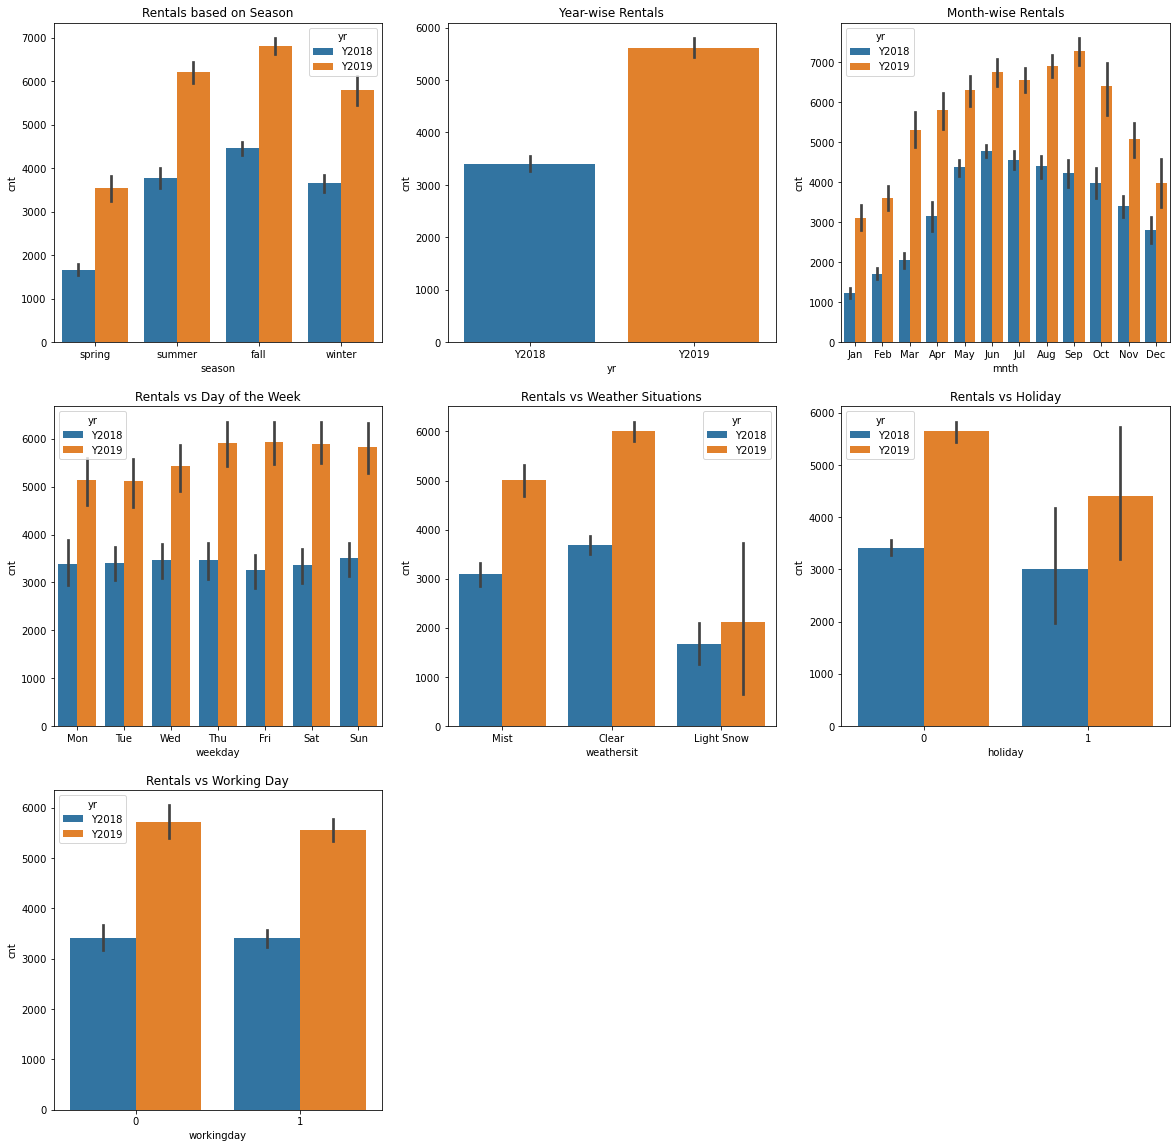

In [18]:
# Visualizing categorical Columns against target variable cnt
plt.figure(figsize=(20,20))
plt.subplot(331)
plt.title('Rentals based on Season')
sns.barplot(x=boom.season,y='cnt',hue='yr',data=boom)
plt.subplot(332)
plt.title('Year-wise Rentals')
sns.barplot(x='yr',y='cnt',data=boom)
plt.subplot(333)
plt.title('Month-wise Rentals')
sns.barplot(x='mnth',y='cnt', hue='yr',data=boom)
plt.subplot(334)
plt.title('Rentals vs Day of the Week')
sns.barplot(x='weekday',y='cnt', hue='yr',data=boom)
plt.subplot(335)
plt.title('Rentals vs Weather Situations')
sns.barplot(x='weathersit',y='cnt', hue='yr',data=boom)
plt.subplot(336)
plt.title('Rentals vs Holiday')
sns.barplot(x='holiday',y='cnt', hue='yr',data=boom)
plt.subplot(337)
plt.title('Rentals vs Working Day')
sns.barplot(x='workingday',y='cnt', hue='yr',data=boom)
plt.show();

### We can make the following observations :

- Overall growth in the industry is very evident in all the bar graphs with clear indication of growth from year 2018 to 2019 

- May, June and July months on a average are the more popular months as per box plots where not only the rentals are at rise, but also the lower whisker value is noticably higher than the median values of January and December months. From the bar plot it is evident that Sept of 2019 was highest.

- We can observe from this that the BoomBikes rentals business is increasing yearly. There is a noticable rise in the business from the year 2018 to 2019

- In the Rentals vs. Weather Situations we see a decrease in the rentals in light snow. Also, notice the absence of the value 'Heavy Rain' from the plot altogether. This could be because of lack of data or we can say people avoid biking in heavy rain due to safety hazards.

- We can also observe minimal difference in the Rentals vs Working Day plot. This means working day is not a decisive factor as per the EDA analysis.

In [19]:
boom.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,Y2018,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,Y2018,Jan,0,Tue,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,Y2018,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,Y2018,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,Y2018,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Checking the numerical columns now

In [20]:
boom_numeric=boom.select_dtypes(include=['float64', 'int64'])
boom_numeric.head()

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,9.305237,11.46350,43.6957,12.522300,82,1518,1600


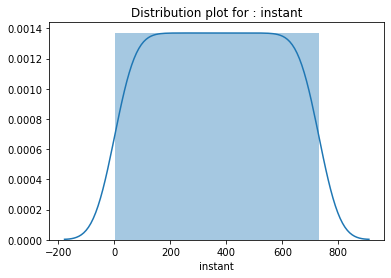

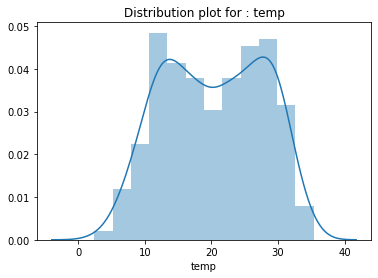

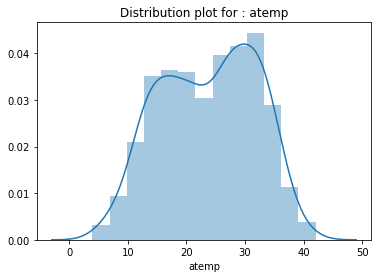

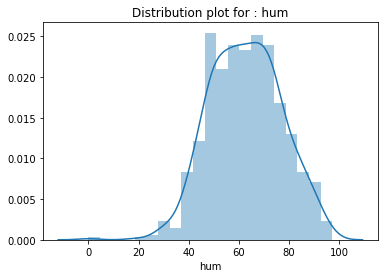

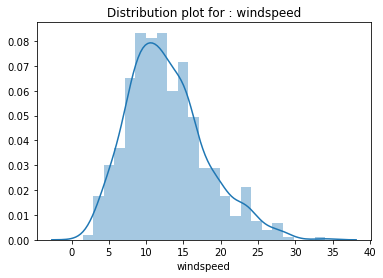

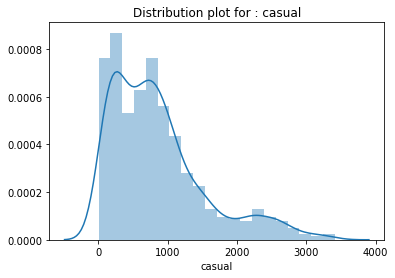

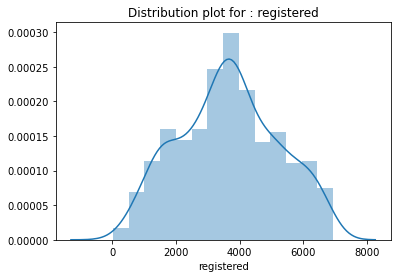

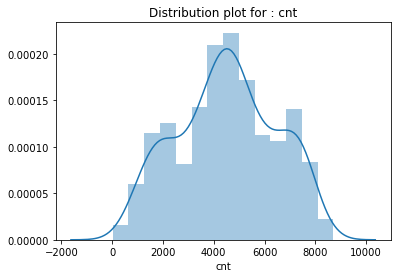

In [21]:
x=list(boom.describe().columns)
for i in x:
    sns.distplot(boom[i])
    plt.title('Distribution plot for : '+i )
    plt.show();
    print('=====================================================================================')

- We can observe that pretty much all columns are normally distributed and the variable instant is useless for our analysis and will be discarded soon.

In [22]:
numericals = boom[boom.describe().columns]

In [23]:
numericals.head()

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,9.305237,11.46350,43.6957,12.522300,82,1518,1600


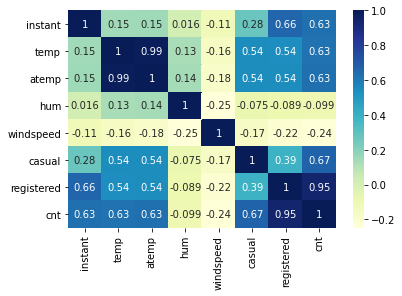

In [24]:
sns.heatmap(numericals.corr(),cmap='YlGnBu', annot=True)
plt.show;

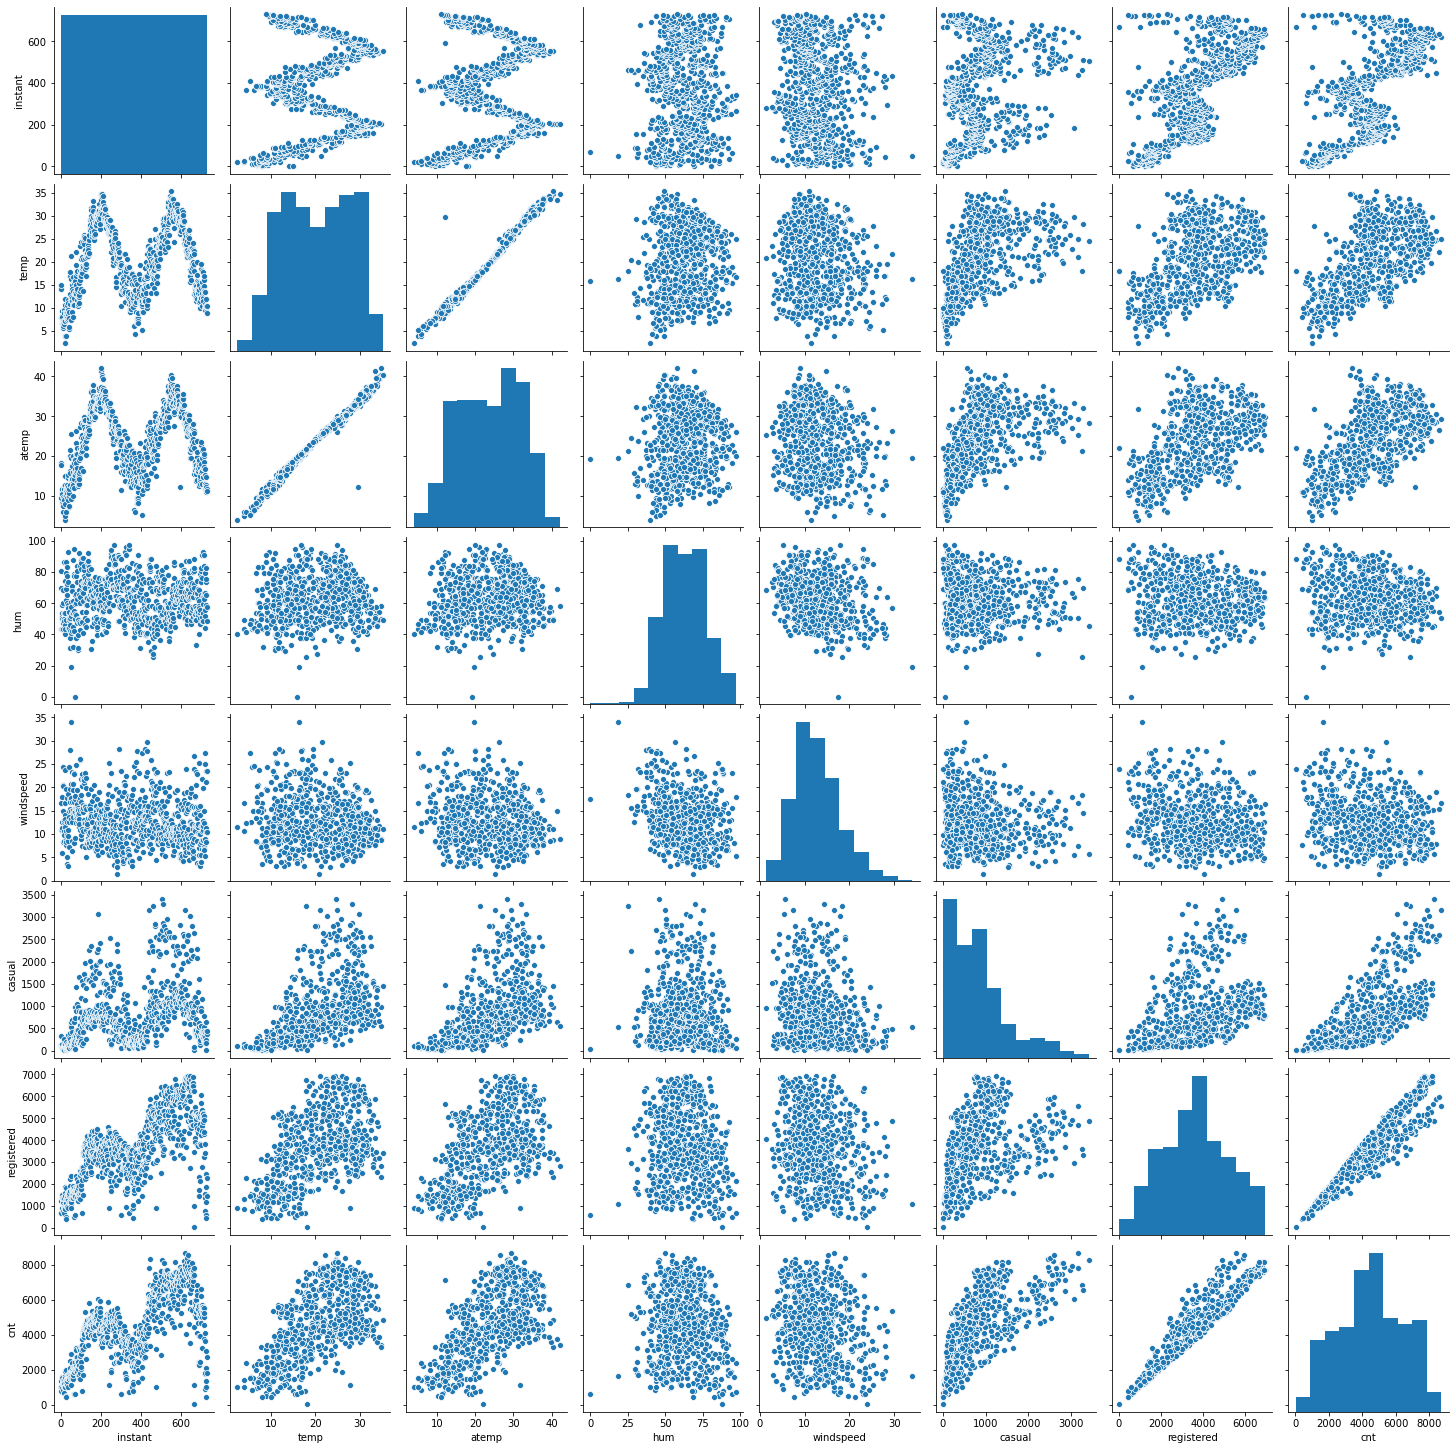

In [25]:
sns.pairplot(numericals)
plt.show();

#### Observations from above plot
- The instant columns does not serve any purpose and should be eliminated
- Very strong linear relation between atemp and temp. This could be because both are similar in nature. What a temperature feels like is nearer to what it actually is.
- As we can see from the head of the dataframe, cnt is a derived sum of casual and registered columns hence a heavy correlation there.

## Step 3: Data Preparation
- The dataset has many values that are categorical that needs to be changed to dummy variable

- We will also need to scale some of the columns so that their coefficients are not unusually high or low.

#### Dropping columns
- Dropping columns registered and casual because they add up to cnt which is our target variable and we have observed very high collinearity among them
- Also dropping atemp because temp and atemp are very similar and will only add redunduncy of variables in our upcoming model.
- Dropping dteday because that also does not serve our purpose because we have the time covered in the mnth, yr columns.

In [26]:
boom.drop(['atemp','casual','registered','dteday','instant'], axis=1, inplace=True)
numericals = boom[boom.describe().columns] # Setting numericals columns
boom.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,Y2018,Jan,0,Mon,1,Mist,14.110847,80.5833,10.749882,985
1,spring,Y2018,Jan,0,Tue,1,Mist,14.902598,69.6087,16.652113,801
2,spring,Y2018,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,Y2018,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,Y2018,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


In [27]:
boom_categorical

,season,yr,mnth,holiday,weekday,workingday,weathersit
0,spring,Y2018,Jan,0,Mon,1,Mist
1,spring,Y2018,Jan,0,Tue,1,Mist
2,spring,Y2018,Jan,0,Wed,1,Clear
3,spring,Y2018,Jan,0,Thu,1,Clear
4,spring,Y2018,Jan,0,Fri,1,Clear
...,...,...,...,...,...,...,...
725,spring,Y2019,Dec,0,Fri,1,Mist
726,spring,Y2019,Dec,0,Sat,0,Mist
727,spring,Y2019,Dec,0,Sun,0,Mist
728,spring,Y2019,Dec,0,Mon,1,Clear


In [28]:
# Here observe the drop_fist=True. That is because we only need m-1 variables to describe m values of the column
# For example if gender has two values, you only need to show M as 1 or 0 it will be sufficient to classify M and F as gender
# Creating the dummies for all categorical columns 

df_dummies=pd.get_dummies(boom_categorical, drop_first=True)

In [29]:
df_dummies.head()

,season_spring,season_summer,season_winter,yr_Y2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,...,holiday_1,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_1,weathersit_Light Snow,weathersit_Mist
0,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [30]:
list(boom_categorical)

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [31]:
# Since dummies are created, we do not need the original columns. Dropping them

boom = boom.drop(list(boom_categorical), axis=1)

In [32]:
# Adding the dummies columns created for categorical columns in the dataframe

boom=pd.concat([boom,df_dummies], axis=1)

In [33]:
boom.head()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_Y2019,mnth_Aug,mnth_Dec,...,holiday_1,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_1,weathersit_Light Snow,weathersit_Mist
0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [34]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
X_train, X_test = train_test_split(boom, train_size = 0.8, test_size = 0.2, random_state = 100)

In [35]:
numerical_var=['temp','hum', 'windspeed']

In [36]:
# Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[numerical_var] = scaler.fit_transform(X_train[numerical_var])
X_test[numerical_var] = scaler.transform(X_test[numerical_var])

In [37]:
X_train.head()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_Y2019,mnth_Aug,mnth_Dec,...,holiday_1,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_1,weathersit_Light Snow,weathersit_Mist
367,-1.884077,-1.351866,2.236778,2236,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
648,-0.306750,-1.193941,-0.119144,7570,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
44,-0.417439,-1.819690,2.905344,1913,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
705,-0.938605,0.957450,-0.771827,5008,0,0,1,1,0,1,...,0,0,1,0,0,0,0,0,0,1
379,-1.791834,-1.509791,0.772439,2311,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0


In [38]:
X_train.describe()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_Y2019,mnth_Aug,mnth_Dec,...,holiday_1,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_1,weathersit_Light Snow,weathersit_Mist
count,5.840000e+02,5.840000e+02,5.840000e+02,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,-3.175732e-16,-1.383501e-16,4.976042e-17,4505.267123,0.251712,0.246575,0.250000,0.513699,0.090753,0.087329,...,0.027397,0.155822,0.119863,0.130137,0.145548,0.159247,0.136986,0.726027,0.027397,0.342466
std,1.000857e+00,1.000857e+00,1.000857e+00,1958.617712,0.434369,0.431387,0.433384,0.500241,0.287504,0.282558,...,0.163378,0.362997,0.325080,0.336743,0.352955,0.366220,0.344128,0.446377,0.163378,0.474941
min,-2.386994e+00,-4.507430e+00,-1.901900e+00,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.763408e-01,-7.886914e-01,-7.161146e-01,3070.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.454239e-02,2.925235e-02,-1.470392e-01,4566.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,8.843166e-01,7.138525e-01,5.414641e-01,6035.750000,1.000000,0.000000,0.250000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,2.054631e+00,2.432430e+00,4.051532e+00,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
# Ensure the split numbers
X_train.shape

(584, 29)

In [40]:
X_test.shape

(146, 29)

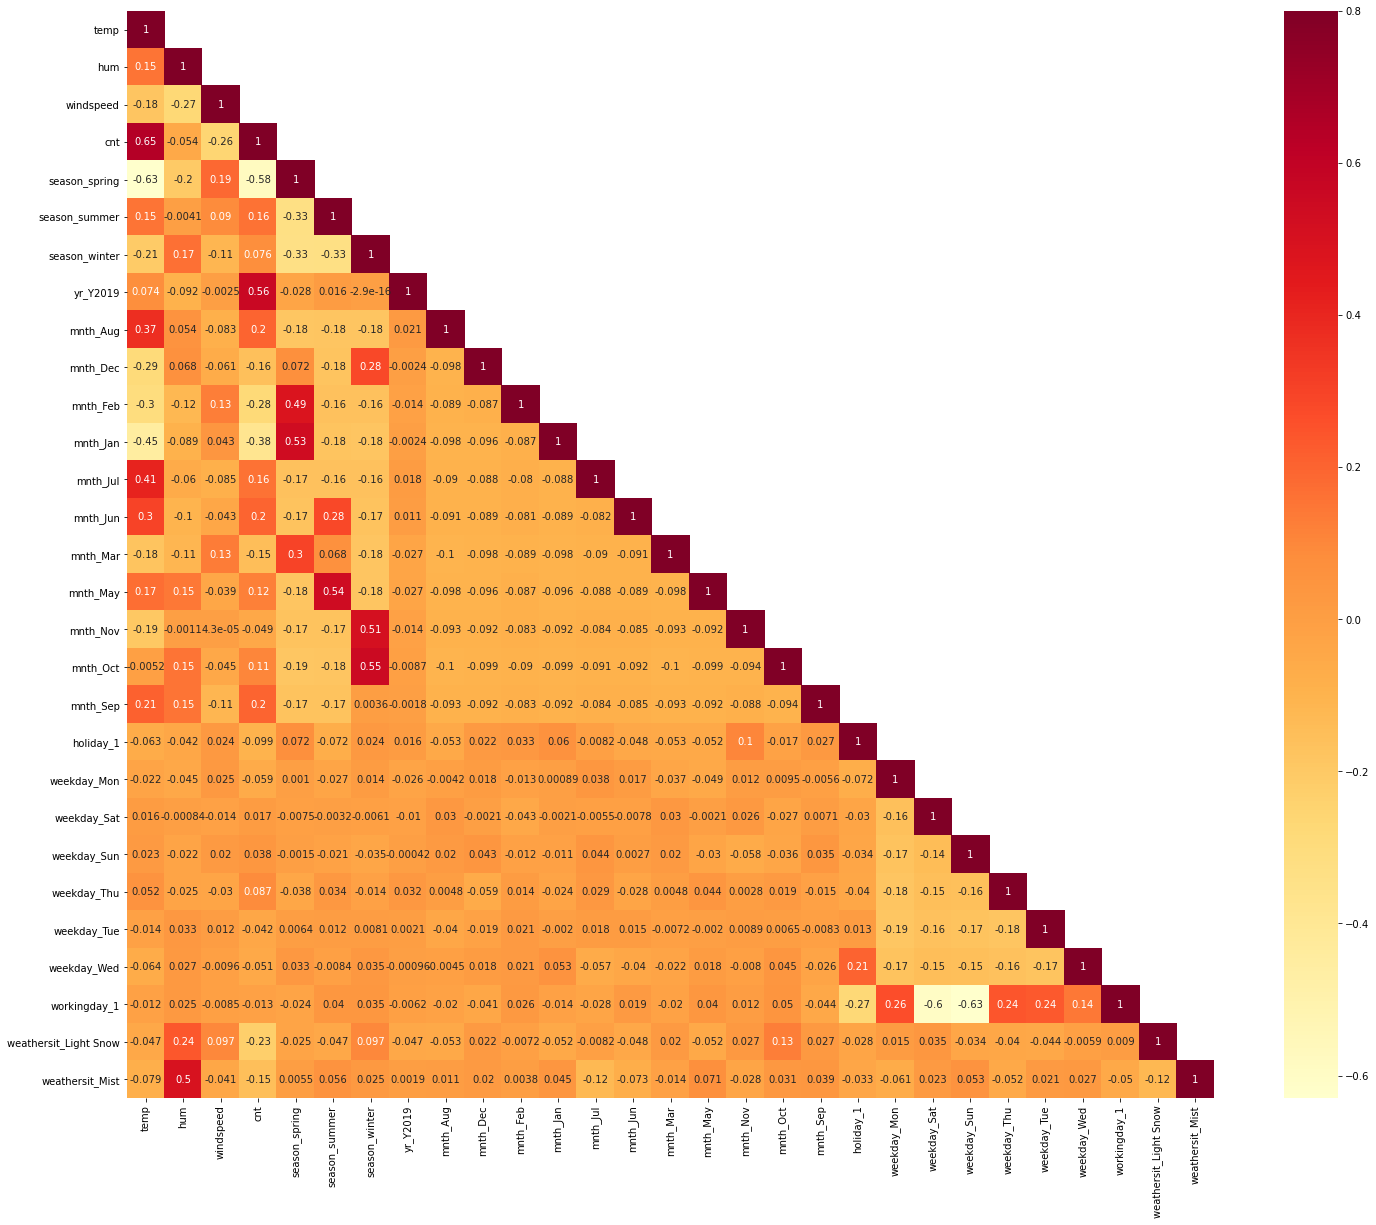

In [41]:
#Heatmap
mask = np.array(X_train.corr())
mask[np.tril_indices_from(mask)] = False
fig, ax= plt.subplots()
fig.set_size_inches(25,20)
sns.heatmap(X_train.corr() ,mask=mask, vmax=0.8, square=True,cmap='YlOrRd',annot = True)
plt.show();

- We observe that Spring is negatively correlated to cnt
- Working day has negative correlation as expected because Saturday Sunday means not a working day
- cnt variable has a .56 correlation with year which indicates rising rentals with year
- Weather situation Mist has strong positive correlation with Humidity
- temp has a strong relation with cnt which indicates high temperature means high rentals.

#### Step 5: Building the Linear Model

As you know, the first basic step for regression is performing a train-test split.


In [42]:
# Splitting the y column - our target column from X_train

y_train=X_train.pop('cnt')
y_test=X_test.pop('cnt')

In [43]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [44]:

regressor.coef_

array([ 8.72379711e+02, -1.88456110e+02, -2.58765640e+02, -4.89122127e+02,
        3.63029589e+02,  9.57980776e+02,  1.98207167e+03,  1.68441166e+02,
       -4.38856594e+02, -2.63993456e+02, -5.11693998e+02, -2.85953954e+02,
        9.96725620e+01,  3.08005547e+01,  1.66173157e+02, -4.32821764e+02,
        1.10780389e+02,  6.91608119e+02, -1.14965797e+03, -2.75163390e+02,
       -3.92053336e+02, -3.32548163e+02,  6.47499497e-01, -2.50494031e+02,
       -1.04348486e+02, -4.19294219e+02, -2.24037015e+03, -4.99781530e+02])

In [45]:
coeff_df = pd.DataFrame(regressor.coef_, X_train.columns, columns=['Coefficient'])

In [46]:
coeff_df

,Coefficient
temp,872.379711
hum,-188.456110
windspeed,-258.765640
season_spring,-489.122127
season_summer,363.029589
season_winter,957.980776
yr_Y2019,1982.071674
mnth_Aug,168.441166
mnth_Dec,-438.856594
mnth_Feb,-263.993456


In [47]:
regressor.intercept_

4089.527937363985

In [48]:
y_pred = regressor.predict(X_test)

In [49]:
df = pd.DataFrame({
    'Actual':y_test,
    'Predicted':y_pred
})
df

,Actual,Predicted
184,6043,3542.519236
535,6211,7832.649437
299,2659,3898.986444
221,4780,5419.232536
152,4968,5347.094407
...,...,...
219,4326,5107.300042
719,3623,2952.695808
3,1562,1422.922349
392,4023,3584.566827


In [50]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 625.9241360021701
Mean Squared Error: 683923.2053263152
Root Mean Squared Error: 826.9964965622981


In [51]:
yhat = regressor.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.8547321208079326 0.8474032908667112


In [52]:
yhat = regressor.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.7986343880208162 0.7504443270343448


#### Model Building using RFE

As you know, the first basic step for regression is performing a train-test split.

In [53]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [54]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [55]:
#List of variables selected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('hum', False, 7),
 ('windspeed', False, 3),
 ('season_spring', True, 1),
 ('season_summer', False, 2),
 ('season_winter', True, 1),
 ('yr_Y2019', True, 1),
 ('mnth_Aug', False, 10),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 11),
 ('mnth_Mar', False, 13),
 ('mnth_May', False, 8),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('holiday_1', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', False, 5),
 ('weekday_Sun', False, 6),
 ('weekday_Thu', False, 14),
 ('weekday_Tue', True, 1),
 ('weekday_Wed', False, 9),
 ('workingday_1', False, 4),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist', True, 1)]

In [56]:
#Columns where RFE support is True
true_col = X_train.columns[rfe.support_]
true_col

Index(['temp', 'season_spring', 'season_winter', 'yr_Y2019', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep', 'holiday_1',
       'weekday_Mon', 'weekday_Tue', 'weathersit_Light Snow',
       'weathersit_Mist'],
      dtype='object')

In [57]:
#Columns where RFE support is False
X_train.columns[~rfe.support_]

Index(['hum', 'windspeed', 'season_summer', 'mnth_Aug', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Oct', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Wed', 'workingday_1'],
      dtype='object')

#### Model Building using Status Model for detailed statistics

As you know, the first basic step for regression is performing a train-test split.

In [58]:
# Lets create the Training data with only the RFE selected columns
X_train_w_rfe=X_train[true_col]

In [59]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_w_rfe = sm.add_constant(X_train_w_rfe)

In [60]:
# Running the first fitted linear model 
lm1 = sm.OLS(y_train,X_train_w_rfe).fit()
# Print a summary of the linear regression model derived
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.1
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          4.63e-212
Time:                        22:57:06   Log-Likelihood:                -4725.6
No. Observations:                 584   AIC:                             9483.
Df Residuals:                     568   BIC:                             9553.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4097.35

#### Checking the VIF - Variance Inflation Factor
It gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [61]:
#Drop the constant term B0
X_train_w_rfe = X_train_w_rfe.drop(['const'], axis=1)

In [62]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [63]:
checkVIF(X_train_w_rfe)

,Features,VIF
1,season_spring,3.92
0,temp,2.86
2,season_winter,2.40
6,mnth_Jan,2.40
5,mnth_Feb,2.04
8,mnth_Nov,1.77
3,yr_Y2019,1.75
4,mnth_Dec,1.66
7,mnth_Jul,1.40
14,weathersit_Mist,1.39


In [64]:
# We can see that the p-value of mnth_Feb is high comparatively with low VIF so we can consider it insignificant and rebuild the model without it
X_train_2=X_train_w_rfe.drop(['mnth_Feb'], axis=1)


In [65]:
X_train_2=sm.add_constant(X_train_2)
lm2=sm.OLS(y_train,X_train_2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     206.7
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          2.03e-212
Time:                        22:57:07   Log-Likelihood:                -4727.6
No. Observations:                 584   AIC:                             9485.
Df Residuals:                     569   BIC:                             9551.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4084.27

In [66]:
checkVIF(X_train_2)

,Features,VIF
0,const,5.90
1,temp,3.34
2,season_spring,2.84
3,season_winter,2.13
8,mnth_Nov,1.63
6,mnth_Jan,1.58
5,mnth_Dec,1.39
7,mnth_Jul,1.31
9,mnth_Sep,1.11
11,weekday_Mon,1.05


In [67]:
# We can still try to improve our model by removing mnth_Jan due to comparatively high p-value
X_train_3=X_train_2.drop(['mnth_Jan'], axis=1)

In [68]:
X_train_3=sm.add_constant(X_train_3)
lm3=sm.OLS(y_train,X_train_3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     220.1
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          2.94e-212
Time:                        22:57:07   Log-Likelihood:                -4730.7
No. Observations:                 584   AIC:                             9489.
Df Residuals:                     570   BIC:                             9551.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4063.24

In [69]:
checkVIF(X_train_3)

,Features,VIF
0,const,5.83
1,temp,3.08
2,season_spring,2.72
3,season_winter,2.12
7,mnth_Nov,1.61
5,mnth_Dec,1.31
6,mnth_Jul,1.29
8,mnth_Sep,1.11
10,weekday_Mon,1.05
13,weathersit_Mist,1.05


- So our best fitted line comes out to be 

cnt = 4063.2 + 886.1 X temp + (-1068.8 X season_spring) + (718.59 X season_winter) + (2007.14 X yr_Y2019) + (-359.8 X mnth_Dec) + (-536.2 X mnth_Nov) + (-514.2 X mnth_Nov) + (455.1 X mnth_Sep) + (-891 X holiday_1) + (-293.1 X weekday_Mon) + (-272.8 X weekday_Tue) + (-2714.45 X weathersit_Light Snow) + (-686.7 X weathersit_Mist)

#### Residual Analysis of the model


In [70]:
y_train_pred = lm3.predict(X_train_3)

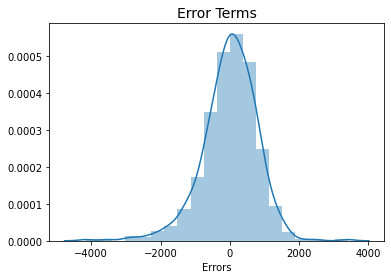

In [71]:
# Plot the hist of error term --> TRAIN

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins=20)
plt.title("Error Terms", fontsize=14)
plt.xlabel("Errors", fontsize=10);

Text(0, 0.5, 'y_pred')

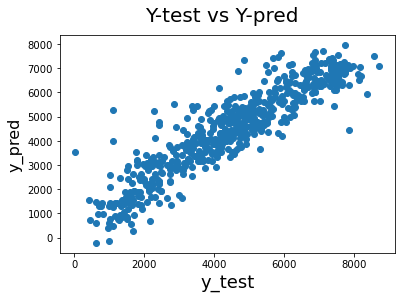

In [72]:
# Plotting y_test and y_pred to understand the spread
# Homoscedasticity demonstrated 

fig = plt.figure()
plt.scatter(y_train, y_train_pred)
fig.suptitle('Y-test vs Y-pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)